In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y[:3]

0    0.0
1    0.0
2    0.0
Name: target, dtype: float64

In [7]:
knn = KNeighborsClassifier(n_neighbors=4)

In [8]:
sfs = SFS(knn, k_features=3, forward=True, scoring='accuracy', cv=0, n_jobs=1)

In [9]:
sfs = sfs.fit(X, y)

In [10]:
import warnings
warnings.filterwarnings('ignore')

sfs.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('petal width (cm)',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('petal length (cm)', 'petal width (cm)'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('sepal width (cm)',
   'petal length (cm)',
   'petal width (cm)'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan}}

In [11]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)",[0.96],0.96,"(petal width (cm),)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length (cm), petal width (cm))",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(sepal width (cm), petal length (cm), petal wi...",NaN,0.0,NaN


In [13]:
# for 2 features

sfs = SFS(knn, k_features=2, forward=True, scoring='accuracy', cv=0, n_jobs=1)
sfs = sfs.fit(X, y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)",[0.96],0.96,"(petal width (cm),)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length (cm), petal width (cm))",NaN,0.0,NaN


### Backward feature selection
*here i'm setting forward=False

In [14]:
sfs = SFS(knn, k_features=2, forward=False, scoring='accuracy', cv=0, n_jobs=1)
sfs = sfs.fit(X, y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)",[0.96],0.96,"(sepal length (cm), sepal width (cm), petal le...",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(sepal width (cm), petal length (cm), petal wi...",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length (cm), petal width (cm))",NaN,0.0,NaN


In [15]:
# change cv

sfs = SFS(knn, k_features=2, forward=False, scoring='accuracy', cv=2, n_jobs=1)
sfs = sfs.fit(X, y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.96, 0.9466666666666667]",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.028684,0.006667,0.006667
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal width (cm), petal length (cm), petal wi...",0.057369,0.013333,0.013333
2,"(2, 3)","[0.96, 0.96]",0.96,"(petal length (cm), petal width (cm))",0.0,0.0,0.0


In [18]:
sfs = SFS(knn, k_features=2, forward=False, floating=True, scoring='accuracy', cv=2, n_jobs=1)
sfs = sfs.fit(X, y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.96, 0.9466666666666667]",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.028684,0.006667,0.006667
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal width (cm), petal length (cm), petal wi...",0.057369,0.013333,0.013333
2,"(2, 3)","[0.96, 0.96]",0.96,"(petal length (cm), petal width (cm))",0.0,0.0,0.0


## RFE

In [19]:
df1 = pd.read_csv('BostonHouse.csv.csv')
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [26]:
X[:2]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [27]:
y[:2]

0    24.0
1    21.6
Name: medv, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X, y = X_train, y_train

In [30]:
X[:2]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47


In [32]:
y[:2]

477    12.0
15     19.9
Name: medv, dtype: float64

In [33]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [34]:
lin_reg = LinearRegression()

rfe_mod = RFE(lin_reg)
myvalues = rfe_mod.fit(X, y)
myvalues.support_
myvalues.ranking_

print("Number of features:", myvalues.n_features_)
print("Selected features:", myvalues.support_)
print("feature ranking:", myvalues.ranking_)

Number of features: 6
Selected features: [False False False  True  True  True False  True False False  True False
  True]
feature ranking: [2 5 4 1 1 1 8 1 3 7 1 6 1]


In [35]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [36]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [37]:
# using RFECV

lin_reg = LinearRegression()

rfe_mod = RFECV(lin_reg, cv=2)
myvalues = rfe_mod.fit(X, y)
myvalues.support_
myvalues.ranking_

print("Number of features:", myvalues.n_features_)
print("Selected features:", myvalues.support_)
print("feature ranking:", myvalues.ranking_)

Number of features: 13
Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
feature ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1]


## Embedded methods

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 24.409489761299696


In [39]:
lasso_coeff = pd.DataFrame()
lasso_coeff['columns'] = X_train.columns
lasso_coeff['Coefficient estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

    columns  Coefficient estimate
0      crim             -0.076609
1        zn              0.028501
2     indus             -0.000000
3      chas              0.000000
4       nox             -0.000000
5        rm              1.630489
6       age              0.016395
7       dis             -0.630858
8       rad              0.219654
9       tax             -0.012286
10  ptratio             -0.708582
11    black              0.011181
12    lstat             -0.747107


## using Random Forest to select features

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
importances

array([0.03806177, 0.00175615, 0.00795268, 0.00100426, 0.01554377,
       0.50384493, 0.01383994, 0.06054907, 0.00381091, 0.01566064,
       0.01631341, 0.01215362, 0.30950883])

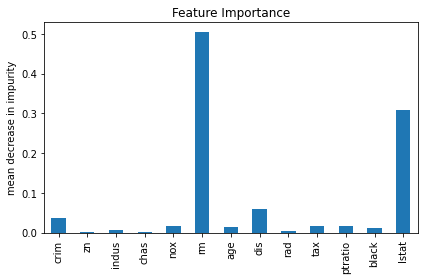

In [41]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title('Feature Importance')
ax.set_ylabel('mean decrease in impurity')
fig.tight_layout()

zn, chas, rad are least important